Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression

**Linear Regression**

In [18]:
import numpy as np


class Linear_Regression:
    def __init__(self, learning_rate=0.01, no_of_iterations=1000):
        """
        Initialize Linear Regression model

        Parameters:
        learning_rate : float, default=0.01
            The learning rate for gradient descent
        no_of_iterations : int, default=1000
            Number of iterations for gradient descent
        """
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fit the linear regression model

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Training data
        y : array-like of shape (n_samples,)
            Target values
        """
        # Initialize parameters
        self.m, self.n = X.shape  # m=number of samples, n=number of features
        self.weights = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y

        # Gradient Descent
        for _ in range(self.no_of_iterations):
            self.update_weights()

        return self

    def update_weights(self):
        """Update weights and bias using gradient descent"""
        # Make predictions
        y_predicted = self.predict(self.X)

        # Calculate gradients
        dw = -(2 * np.dot(self.X.T, (self.y - y_predicted))) / self.m
        db = -2 * np.sum(self.y - y_predicted) / self.m

        # Update parameters
        self.weights = self.weights - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * db

    def predict(self, X):
        """
        Make predictions using the linear model

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Samples

        Returns:
        array-like of shape (n_samples,)
            Predicted values
        """
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        """
        Calculate R² score

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Test samples
        y : array-like of shape (n_samples,)
            True values

        Returns:
        float
            R² score
        """
        predictions = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - predictions) ** 2)
        return 1 - (ss_residual / ss_total)


Using Linear Regression Model for Prediction

In [1]:
#importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
#Data Preprocessing
salary_data = pd.read_csv('D:/Coding/Ml_Projects/Ml/Salary_Data.csv')

In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
# Number of rows and column in the dataframe
salary_data.shape

(30, 2)

In [6]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the target & feature

In [7]:
X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, 1].values

Splitting the dataset into training & test data

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

Training the linear regression model

In [19]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [20]:
model.fit(X_train, Y_train)

In [25]:
print("weight =",model.weights[0])
print("bias =",model.bias)

weight = 9534.934692142133
bias = 23735.972514255136


In [26]:
test_data_prediction = model.predict(X_test)

In [27]:
print(test_data_prediction)

[ 36131.38761404  34224.40067561  66643.17862889  59015.23087518
  91434.00882846  80945.58066711 101922.43698982  52340.77659068
  42805.84189854]


Visualizing the predicted values & actual Values

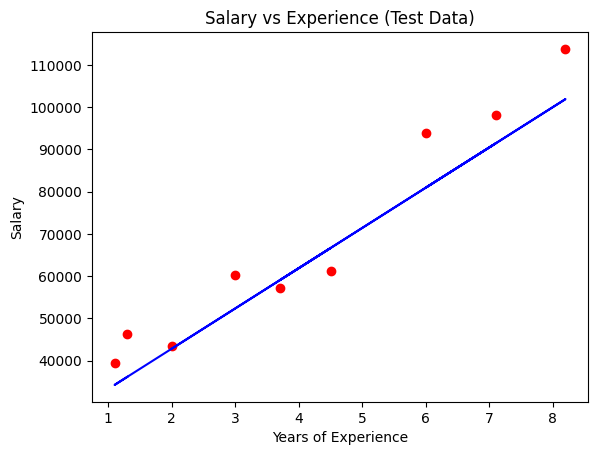

In [28]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.title('Salary vs Experience (Test Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()